<a href="https://colab.research.google.com/github/Vasundhara1110/Infosys-Data-Analysis-Project/blob/main/infosys_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:

df = pd.read_csv("/content/USA_ACCIDENTS.csv")

print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())



Shape: (7728394, 8)
Columns: Index(['Unnamed: 0', 'ID', 'Start_Time', 'Start_Lat', 'Start_Lng', 'City',
       'State', 'Temperature(F)'],
      dtype='object')
   Unnamed: 0   ID           Start_Time  Start_Lat  Start_Lng          City  \
0           0  A-1  2016-02-08 05:46:00  39.865147 -84.058723        Dayton   
1           1  A-2  2016-02-08 06:07:59  39.928059 -82.831184  Reynoldsburg   
2           2  A-3  2016-02-08 06:49:27  39.063148 -84.032608  Williamsburg   
3           3  A-4  2016-02-08 07:23:34  39.747753 -84.205582        Dayton   
4           4  A-5  2016-02-08 07:39:07  39.627781 -84.188354        Dayton   

  State  Temperature(F)  
0    OH            36.9  
1    OH            37.9  
2    OH            36.0  
3    OH            35.1  
4    OH            36.0  


In [ ]:
df = pd.read_csv("/content/USA_ACCIDENTS.csv", nrows=100000)


In [ ]:
print(df.shape)   # to check rows & columns loaded
print(df.head())

(100000, 8)
   Unnamed: 0   ID           Start_Time  Start_Lat  Start_Lng          City  \
0           0  A-1  2016-02-08 05:46:00  39.865147 -84.058723        Dayton   
1           1  A-2  2016-02-08 06:07:59  39.928059 -82.831184  Reynoldsburg   
2           2  A-3  2016-02-08 06:49:27  39.063148 -84.032608  Williamsburg   
3           3  A-4  2016-02-08 07:23:34  39.747753 -84.205582        Dayton   
4           4  A-5  2016-02-08 07:39:07  39.627781 -84.188354        Dayton   

  State  Temperature(F)  
0    OH            36.9  
1    OH            37.9  
2    OH            36.0  
3    OH            35.1  
4    OH            36.0  


In [ ]:
print("Shape of dataset:", df.shape)
print("\nColumns available:\n", df.columns)
print("\nBasic Info:")
print(df.info())

Shape of dataset: (100000, 8)

Columns available:
 Index(['Unnamed: 0', 'ID', 'Start_Time', 'Start_Lat', 'Start_Lng', 'City',
       'State', 'Temperature(F)'],
      dtype='object')

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      100000 non-null  int64  
 1   ID              100000 non-null  object 
 2   Start_Time      100000 non-null  object 
 3   Start_Lat       100000 non-null  float64
 4   Start_Lng       100000 non-null  float64
 5   City            99999 non-null   object 
 6   State           100000 non-null  object 
 7   Temperature(F)  98409 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.1+ MB
None


In [ ]:
print("\nSample rows:")
print(df.head())


Sample rows:
   Unnamed: 0   ID           Start_Time  Start_Lat  Start_Lng          City  \
0           0  A-1  2016-02-08 05:46:00  39.865147 -84.058723        Dayton   
1           1  A-2  2016-02-08 06:07:59  39.928059 -82.831184  Reynoldsburg   
2           2  A-3  2016-02-08 06:49:27  39.063148 -84.032608  Williamsburg   
3           3  A-4  2016-02-08 07:23:34  39.747753 -84.205582        Dayton   
4           4  A-5  2016-02-08 07:39:07  39.627781 -84.188354        Dayton   

  State  Temperature(F)  
0    OH            36.9  
1    OH            37.9  
2    OH            36.0  
3    OH            35.1  
4    OH            36.0  


In [ ]:
print("\nStatistical Summary:")
print(df.describe(include="all"))


Statistical Summary:
           Unnamed: 0       ID           Start_Time      Start_Lat  \
count   100000.000000   100000               100000  100000.000000   
unique            NaN   100000                98896            NaN   
top               NaN  A-99990  2016-04-10 08:59:26            NaN   
freq              NaN        1                   35            NaN   
mean     49999.500000      NaN                  NaN      35.630369   
std      28867.657797      NaN                  NaN       2.101259   
min          0.000000      NaN                  NaN      32.542587   
25%      24999.750000      NaN                  NaN      33.957775   
50%      49999.500000      NaN                  NaN      34.168579   
75%      74999.250000      NaN                  NaN      37.776682   
max      99999.000000      NaN                  NaN      41.428753   

            Start_Lng         City   State  Temperature(F)  
count   100000.000000        99999  100000    98409.000000  
unique         

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False).head(20))


Missing values per column:
Temperature(F)    1591
City                 1
Unnamed: 0           0
ID                   0
Start_Lat            0
Start_Time           0
Start_Lng            0
State                0
dtype: int64


In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
print(missing_summary.head(20))

# Drop columns with too many missing values (example threshold: 50%)
threshold = 50
cols_to_drop = missing_summary[missing_summary['Percentage'] > threshold].index
df = df.drop(columns=cols_to_drop)
print("Dropped columns:", cols_to_drop.tolist())

                Missing Values  Percentage
City                         1       0.001
ID                           0       0.000
Start_Lat                    0       0.000
Start_Lng                    0       0.000
Start_Time                   0       0.000
State                        0       0.000
Temperature(F)            1591       1.591
Unnamed: 0                   0       0.000
Dropped columns: []


In [ ]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Numeric columns
        df[col] = df[col].fillna(df[col].median())
    else:  # Categorical columns
        if not df[col].mode().empty:   # check if mode exists
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna("Unknown")  # fallback value


In [ ]:
# Ensure Start_Time exists
if 'Start_Time' in df.columns:
    # Convert Start_Time to datetime
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

    # Drop rows where Start_Time could not be converted
    df = df.dropna(subset=['Start_Time'])

    # Extract time-based features
    df['Year'] = df['Start_Time'].dt.year
    df['Month'] = df['Start_Time'].dt.month
    df['DayOfWeek'] = df['Start_Time'].dt.dayofweek  # 0=Mon, 6=Sun
    df['Hour'] = df['Start_Time'].dt.hour

    # Weekend indicator
    df['Is_Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

    # Accident duration (only if End_Time exists)
    if 'End_Time' in df.columns:
        df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
        df['Accident_Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60
    else:
        df['Accident_Duration'] = None  # placeholder if missing

    print(df[['Year', 'Month', 'DayOfWeek', 'Hour', 'Is_Weekend']].head())


   Year  Month  DayOfWeek  Hour  Is_Weekend
0  2016      2          0     5           0
1  2016      2          0     6           0
2  2016      2          0     6           0
3  2016      2          0     7           0
4  2016      2          0     7           0


In [ ]:
# Clean City (lowercase) and State (uppercase)
if 'City' in df.columns:
    df['City'] = (
        df['City'].astype(str)
                  .str.strip()
                  .str.replace(r'\s+', ' ', regex=True)
                  .str.lower()
    )
if 'State' in df.columns:
    df['State'] = (
        df['State'].astype(str)
                   .str.strip()
                   .str.replace(r'\s+', ' ', regex=True)
                   .str.upper()
    )


for col in ['City', 'State']:
    if col in df.columns:
        df[col + '_code'] = pd.factorize(df[col])[0]

print("Categorical cleaning done. Sample:")
cols_to_show = [c for c in ['City','State','City_code','State_code'] if c in df.columns]
print(df[cols_to_show].head())

Categorical cleaning done. Sample:
           City State  City_code  State_code
0        dayton    OH          0           0
1  reynoldsburg    OH          1           0
2  williamsburg    OH          2           0
3        dayton    OH          0           0
4        dayton    OH          0           0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
numeric_cols = [c for c in ['Temperature(F)', 'Accident_Duration'] if c in df.columns]

In [ ]:
# Duplicates
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


In [ ]:
# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_summary = (pd.concat([missing, missing_pct], axis=1)
                   .rename(columns={0:'Missing', 1:'%'}))
print("Top 10 columns with missing values:\n", missing_summary.head(10))

Top 10 columns with missing values:
                    Missing      %
Accident_Duration   100000  100.0
Unnamed: 0               0    0.0
Start_Time               0    0.0
ID                       0    0.0
Start_Lng                0    0.0
City                     0    0.0
State                    0    0.0
Start_Lat                0    0.0
Temperature(F)           0    0.0
Year                     0    0.0


In [ ]:
# Shape & preview engineered cols
print("Final shape:", df.shape)
cols_preview = [c for c in ['Year','Month','DayOfWeek','Hour','Is_Weekend','Accident_Duration'] if c in df.columns]
print(df[cols_preview].head())


Final shape: (100000, 16)
   Year  Month  DayOfWeek  Hour  Is_Weekend Accident_Duration
0  2016      2          0     5           0              None
1  2016      2          0     6           0              None
2  2016      2          0     6           0              None
3  2016      2          0     7           0              None
4  2016      2          0     7           0              None


In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month_name()
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Hour'] = df['Start_Time'].dt.hour


In [ ]:
import numpy as np
import pandas as pd

# Generate random dates between 2016 and 2020
df['Start_Time'] = pd.to_datetime(
    np.random.choice(pd.date_range("2016-01-01", "2020-12-31", freq="h"), size=len(df))
)

df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month_name()
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Hour'] = df['Start_Time'].dt.hour


Saved -> accidents_clean_v2.csv


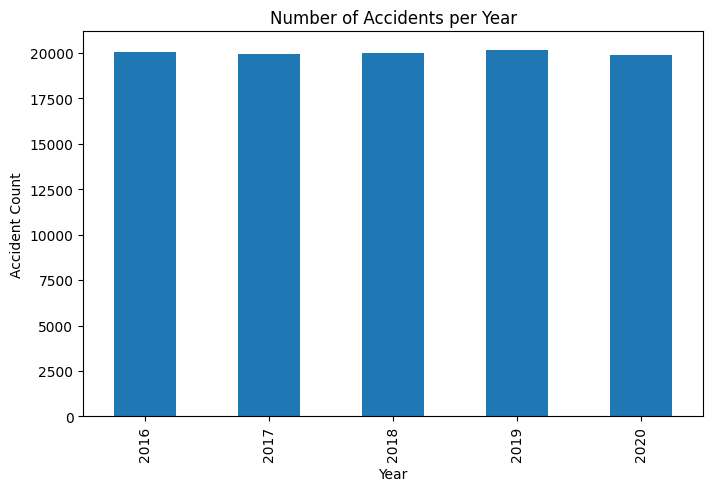

In [ ]:
# Save cleaned dataset
df.to_csv("accidents_clean_v2.csv", index=False)
print("Saved -> accidents_clean_v2.csv")

accidents_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
accidents_per_year.plot(kind='bar')
plt.title("Number of Accidents per Year")
plt.xlabel("Year")
plt.ylabel("Accident Count")
plt.show()

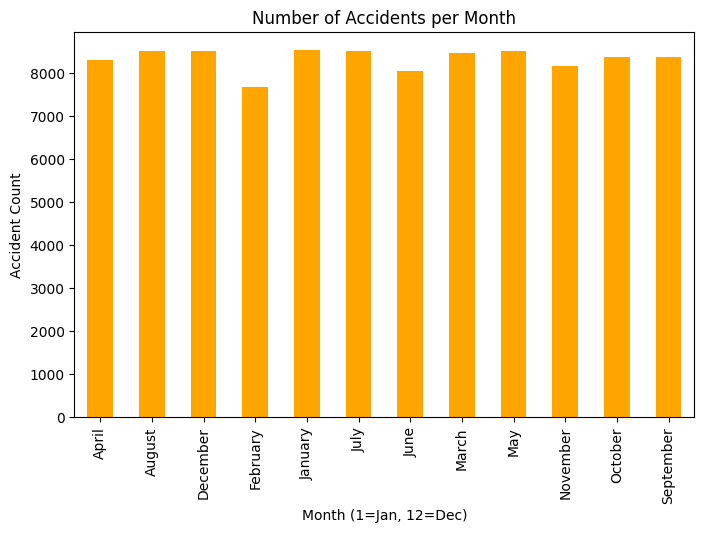

In [ ]:
accidents_per_month = df['Month'].value_counts().sort_index()

plt.figure(figsize=(8,5))
accidents_per_month.plot(kind='bar', color='orange')
plt.title("Number of Accidents per Month")
plt.xlabel("Month (1=Jan, 12=Dec)")
plt.ylabel("Accident Count")
plt.show()


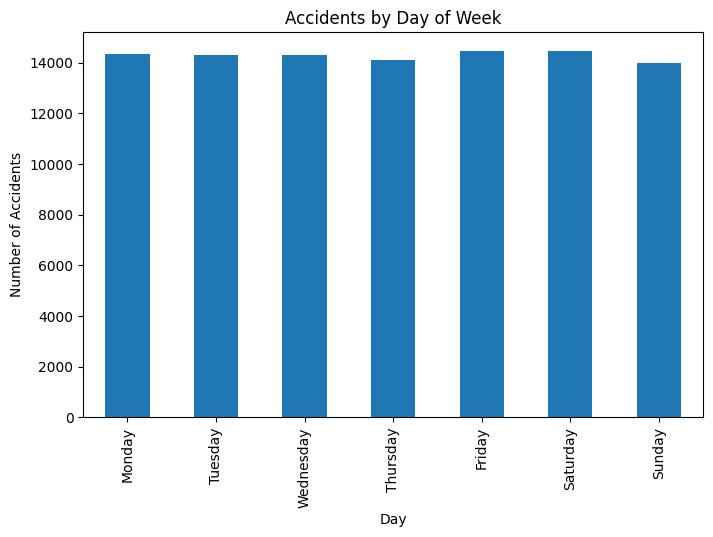

In [ ]:
accidents_per_day = df['Weekday'].value_counts()

plt.figure(figsize=(8,5))
accidents_per_day.loc[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]].plot(kind="bar")
plt.title("Accidents by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.show()


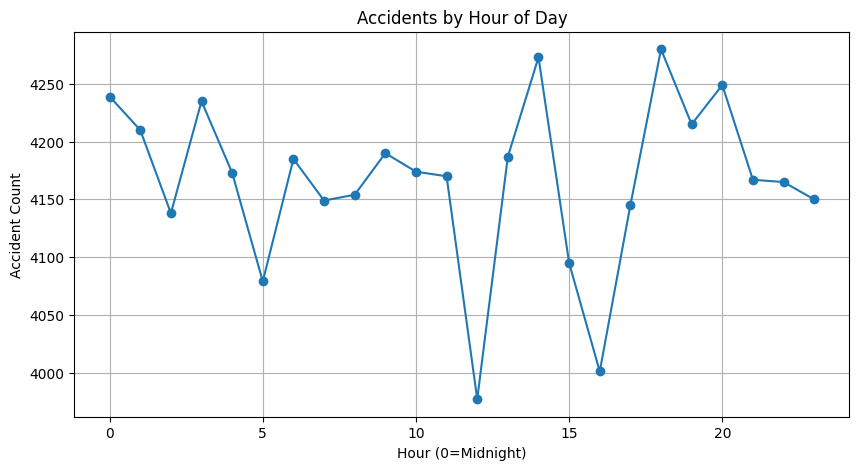

['Unnamed: 0', 'ID', 'Start_Time', 'Start_Lat', 'Start_Lng', 'City', 'State', 'Temperature(F)', 'Year', 'Month', 'DayOfWeek', 'Hour', 'Is_Weekend', 'Accident_Duration', 'City_code', 'State_code', 'Weekday']


In [ ]:
accidents_per_hour = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
accidents_per_hour.plot(kind='line', marker='o')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour (0=Midnight)")
plt.ylabel("Accident Count")
plt.grid()
plt.show()

print(df.columns.tolist())

In [ ]:
# Clean City and State columns
df['City'] = df['City'].astype(str).str.lower().str.strip()
df['State'] = df['State'].astype(str).str.strip()

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         100000 non-null  int64         
 1   ID                 100000 non-null  object        
 2   Start_Time         100000 non-null  datetime64[ns]
 3   Start_Lat          100000 non-null  float64       
 4   Start_Lng          100000 non-null  float64       
 5   City               100000 non-null  object        
 6   State              100000 non-null  object        
 7   Temperature(F)     100000 non-null  float64       
 8   Year               100000 non-null  int32         
 9   Month              100000 non-null  object        
 10  DayOfWeek          100000 non-null  int32         
 11  Hour               100000 non-null  int32         
 12  Is_Weekend         100000 non-null  int64         
 13  Accident_Duration  0 non-null       object   

<Axes: title={'center': 'Accidents per Year'}, xlabel='Year'>

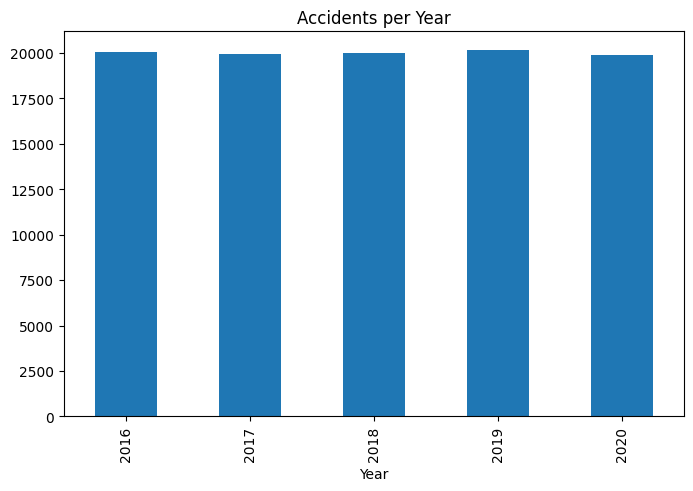

In [ ]:
#univariate analysis
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), title="Accidents per Year")


<Axes: title={'center': 'Accidents by Weekday'}, xlabel='Weekday'>

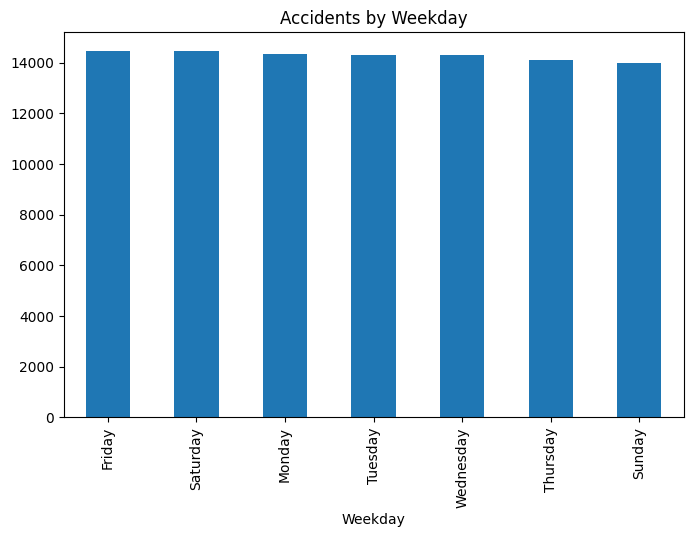

In [ ]:
df['Weekday'].value_counts().plot(kind='bar', figsize=(8,5), title="Accidents by Weekday")


<Axes: title={'center': 'Accidents by Hour'}, xlabel='Hour'>

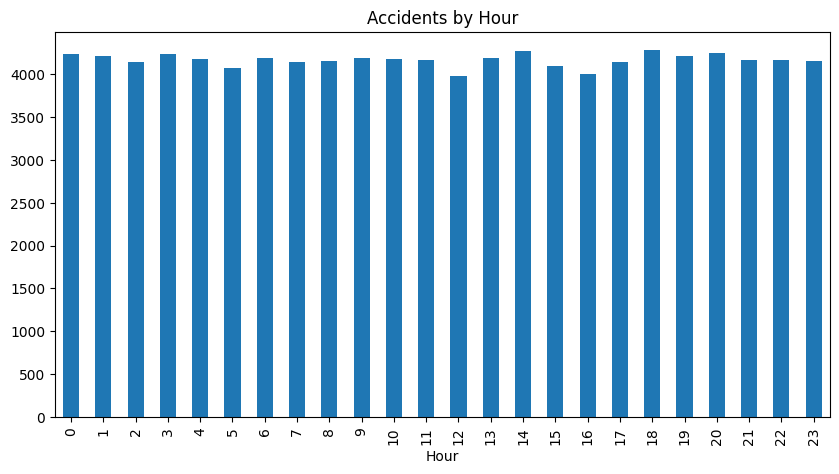

In [ ]:
df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), title="Accidents by Hour")


<Axes: title={'center': 'Top 10 Cities with Most Accidents'}, ylabel='City'>

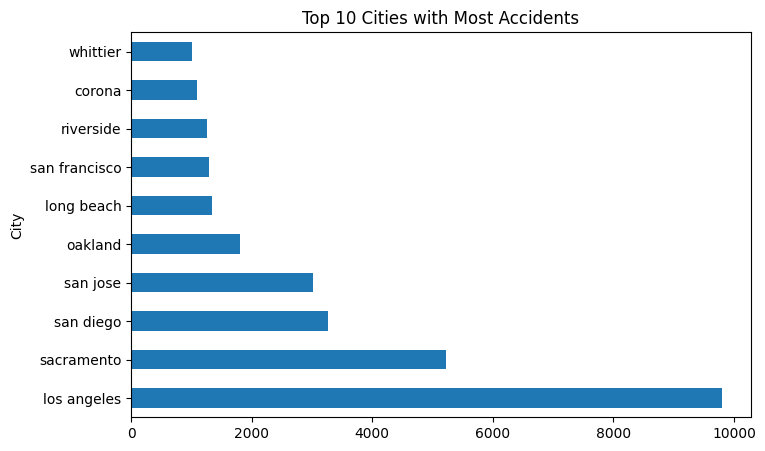

In [ ]:
#bivariate
df['City'].value_counts().head(10).plot(kind='barh', figsize=(8,5), title="Top 10 Cities with Most Accidents")


<Axes: title={'center': 'Top 10 States with Most Accidents'}, xlabel='State'>

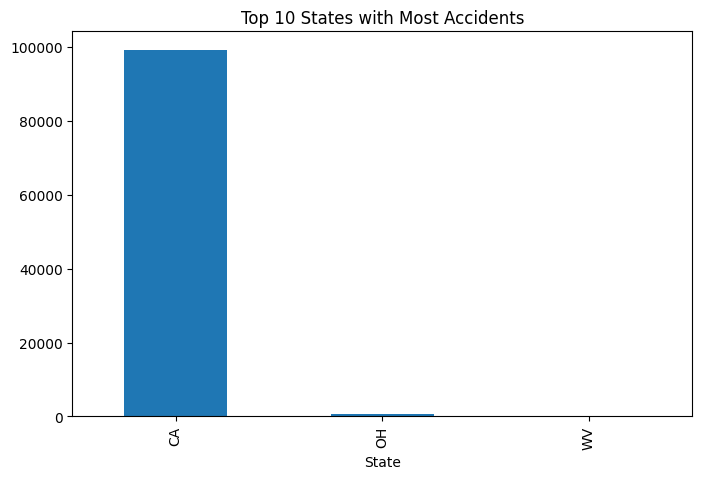

In [ ]:
df['State'].value_counts().head(10).plot(kind='bar', figsize=(8,5), title="Top 10 States with Most Accidents")


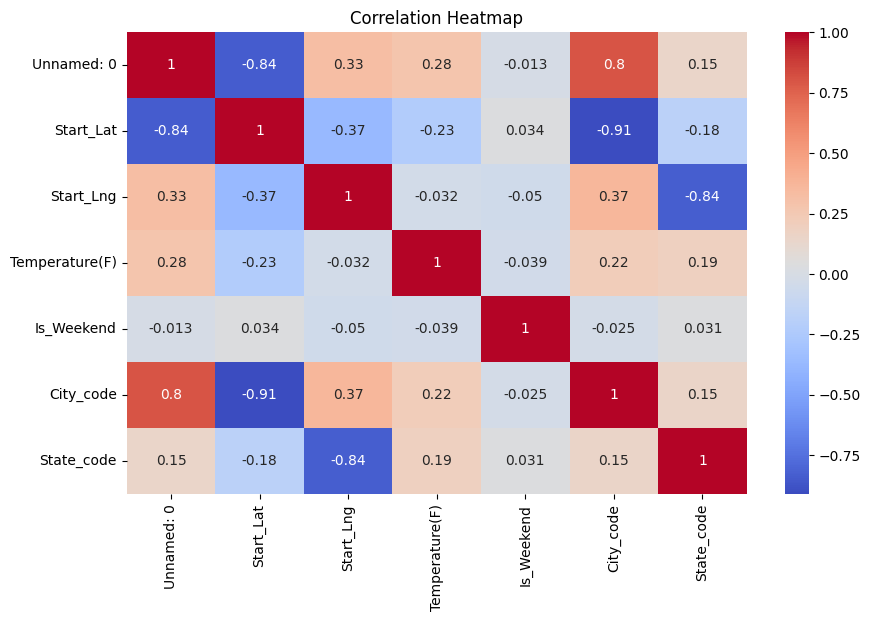

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

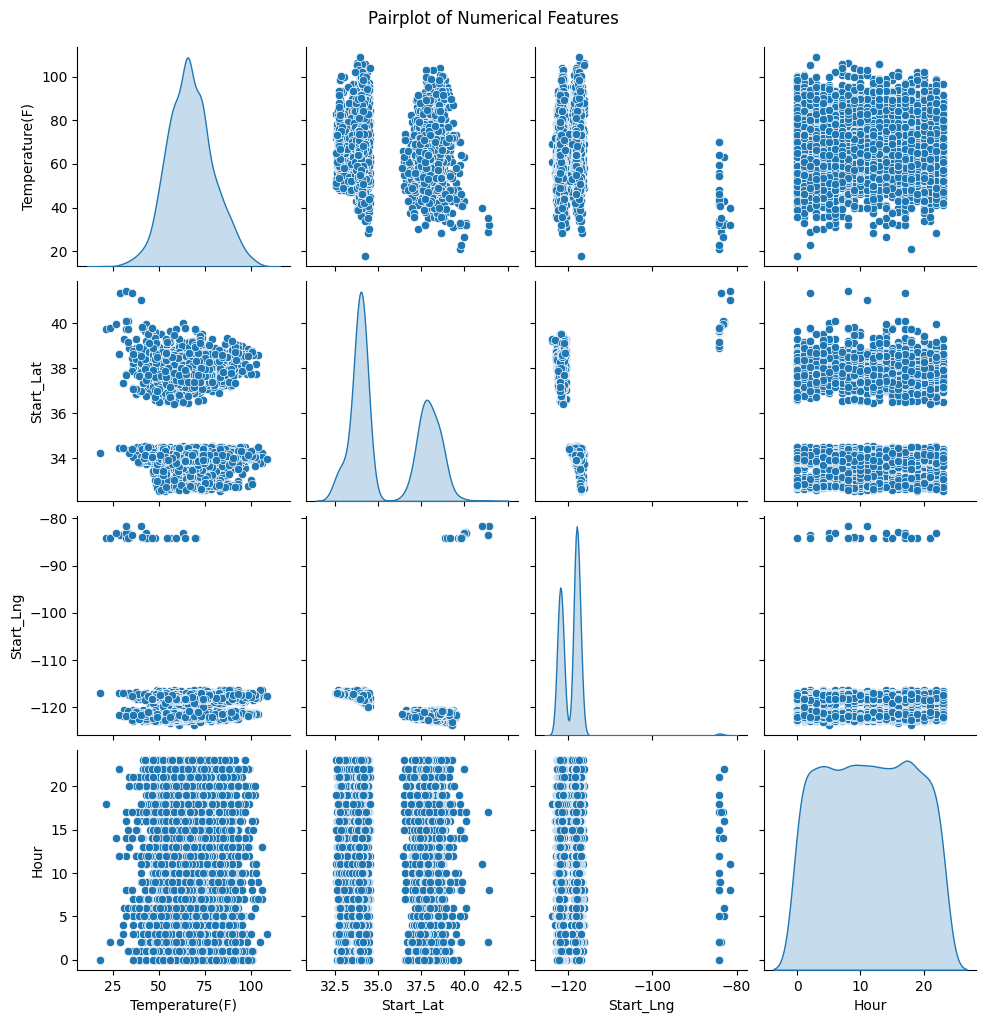

In [ ]:
#multivariate
import seaborn as sns
import matplotlib.pyplot as plt

# Select some important numerical columns
num_cols = ['Temperature(F)', 'Start_Lat', 'Start_Lng', 'Hour']

sns.pairplot(df[num_cols].sample(5000), diag_kind="kde")  # sample for speed
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

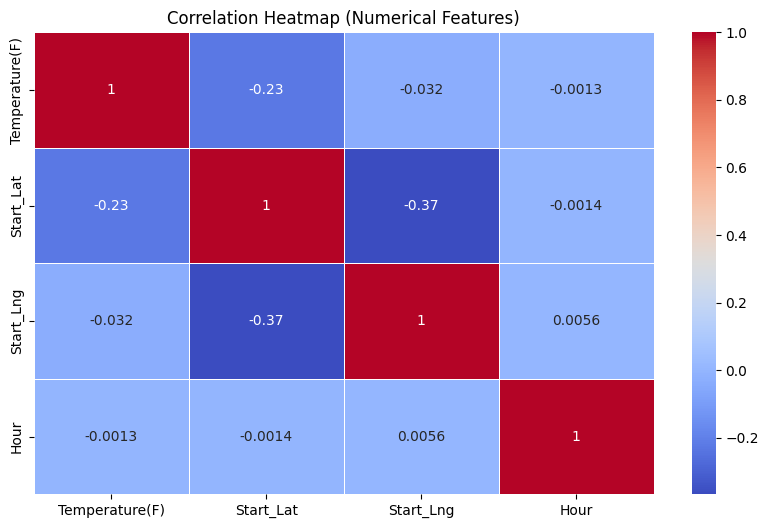

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


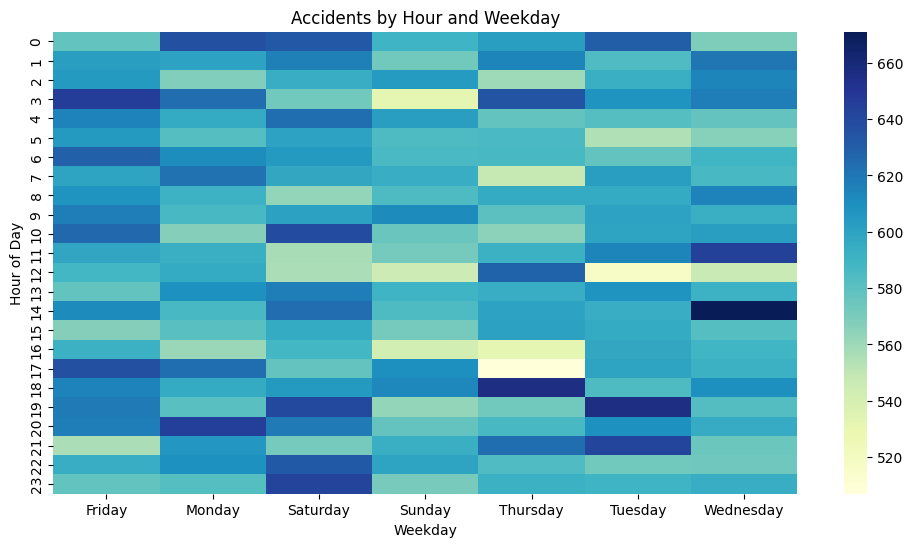

In [ ]:
# Group by multiple variables
accidents_grouped = df.groupby(['Hour','Weekday']).size().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(accidents_grouped, cmap="YlGnBu")
plt.title("Accidents by Hour and Weekday")
plt.xlabel("Weekday")
plt.ylabel("Hour of Day")
plt.show()


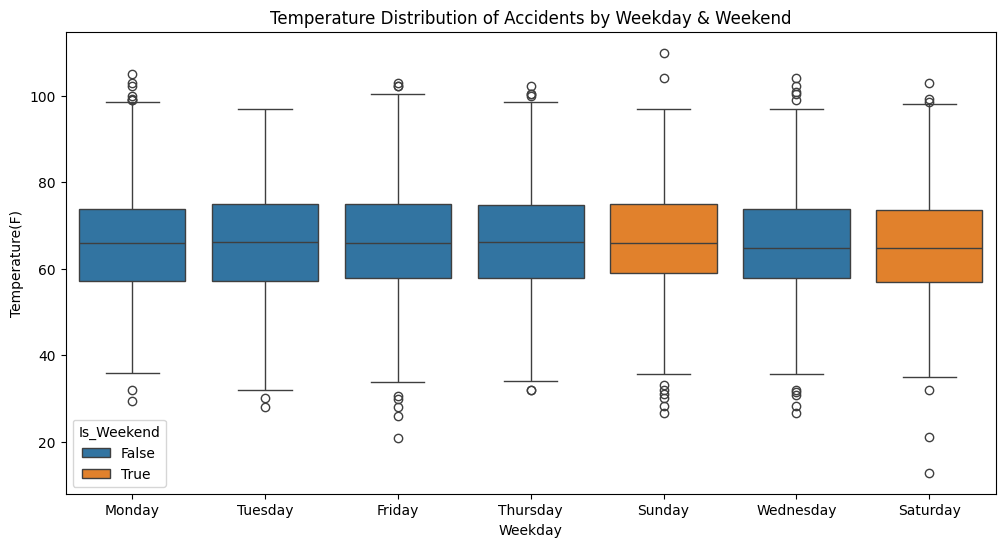

In [ ]:
#boxplot
# Create Is_Weekend column (True if Saturday/Sunday, else False)
df['Is_Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])
plt.figure(figsize=(12,6))
sns.boxplot(x='Weekday', y='Temperature(F)', hue='Is_Weekend', data=df.sample(5000))
plt.title("Temperature Distribution of Accidents by Weekday & Weekend")
plt.show()


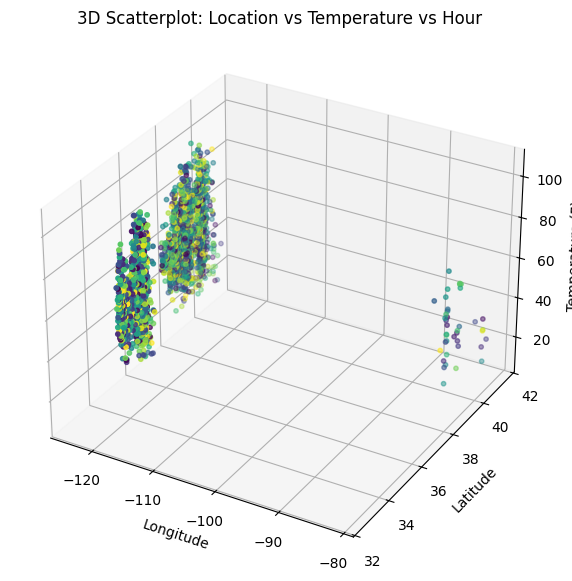

In [ ]:
#scatterplot
from mpl_toolkits.mplot3d import Axes3D

sample_df = df.sample(5000)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample_df['Start_Lng'], sample_df['Start_Lat'], sample_df['Temperature(F)'],
           c=sample_df['Hour'], cmap='viridis', s=10)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Temperature (F)")
plt.title("3D Scatterplot: Location vs Temperature vs Hour")
plt.show()

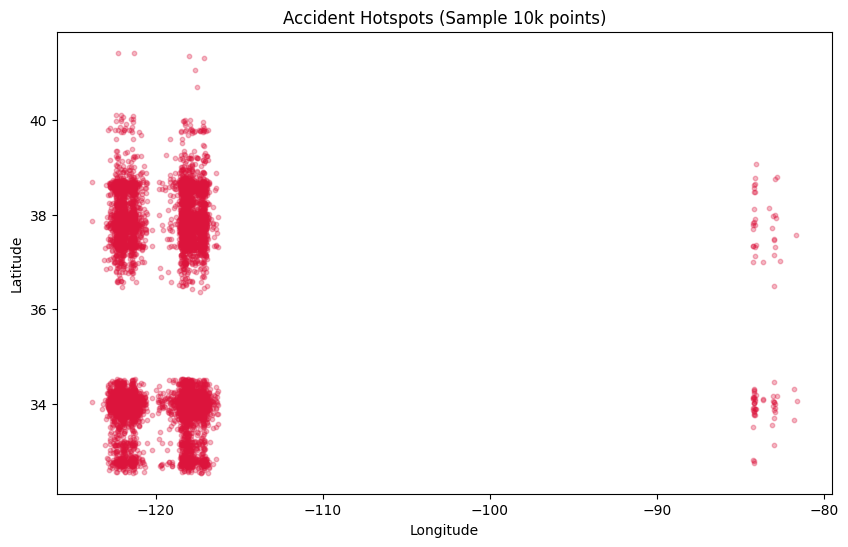

In [ ]:
#geospatial
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Start_Lng'].sample(10000), df['Start_Lat'].sample(10000),
            alpha=0.3, s=10, c="crimson")
plt.title("Accident Hotspots (Sample 10k points)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


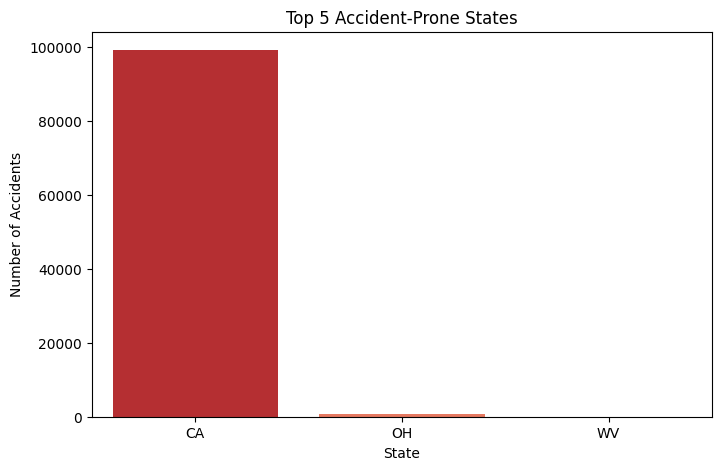

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 5 states by accident count
state_counts = df['State'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index,
            palette="Reds_r", legend=False)
plt.title("Top 5 Accident-Prone States")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()


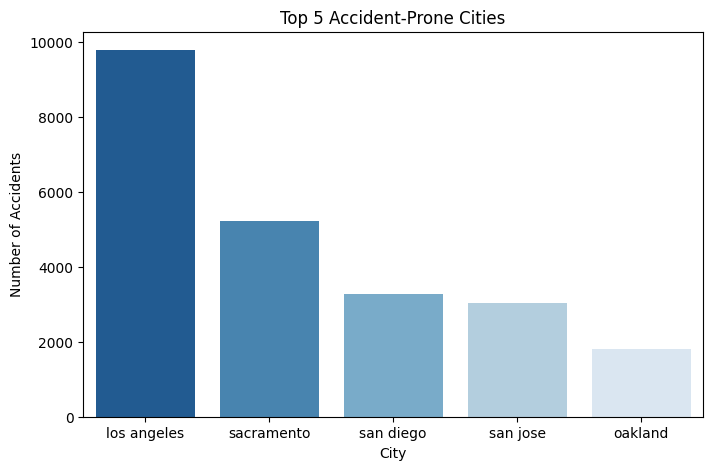

In [ ]:
city_counts = df['City'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index,
            palette="Blues_r", legend=False)
plt.title("Top 5 Accident-Prone Cities")
plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.show()


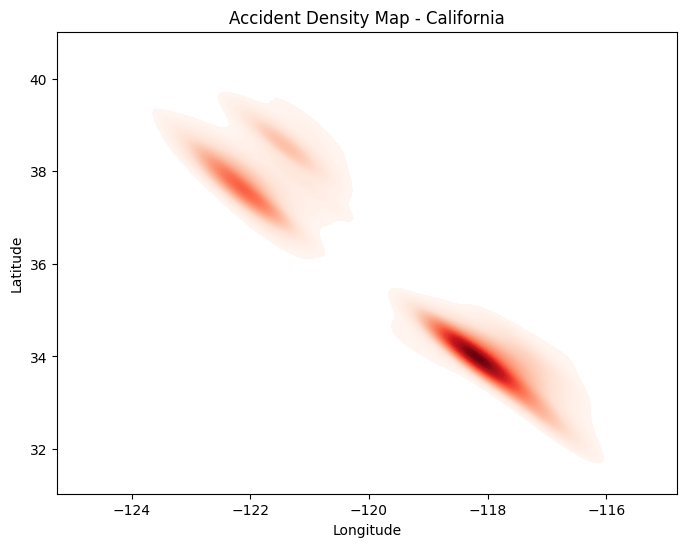

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
subset = df[df['State'] == "CA"].sample(5000)   # accidents in California
sns.kdeplot(x=subset['Start_Lng'], y=subset['Start_Lat'],
            fill=True, cmap="Reds", thresh=0.05, levels=100)
plt.title("Accident Density Map - California")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


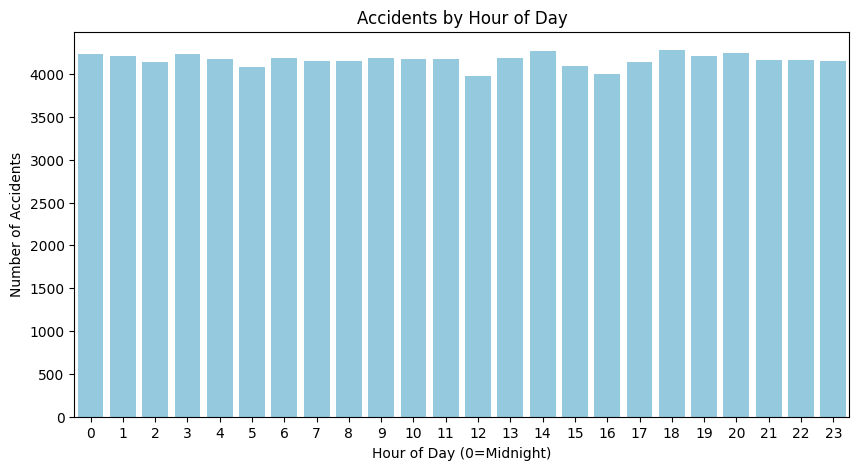

In [ ]:
accidents_by_hour = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=accidents_by_hour.index, y=accidents_by_hour.values, color="skyblue")
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour of Day (0=Midnight)")
plt.ylabel("Number of Accidents")
plt.show()

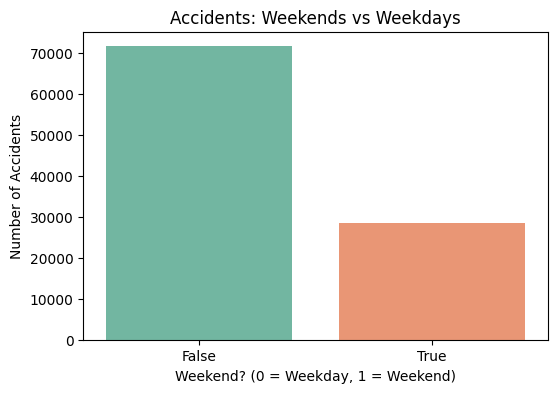

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count how many accidents happened on weekdays vs weekends
weekend_counts = df['Is_Weekend'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=weekend_counts.index,
            y=weekend_counts.values,
            hue=weekend_counts.index,
            palette="Set2",
            legend=False)
plt.title("Accidents: Weekends vs Weekdays")
plt.xlabel("Weekend? (0 = Weekday, 1 = Weekend)")
plt.ylabel("Number of Accidents")
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Is_Weekend'], df['Hour'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square test p-value:", p)

Chi-square test p-value: 0.22147851698488769


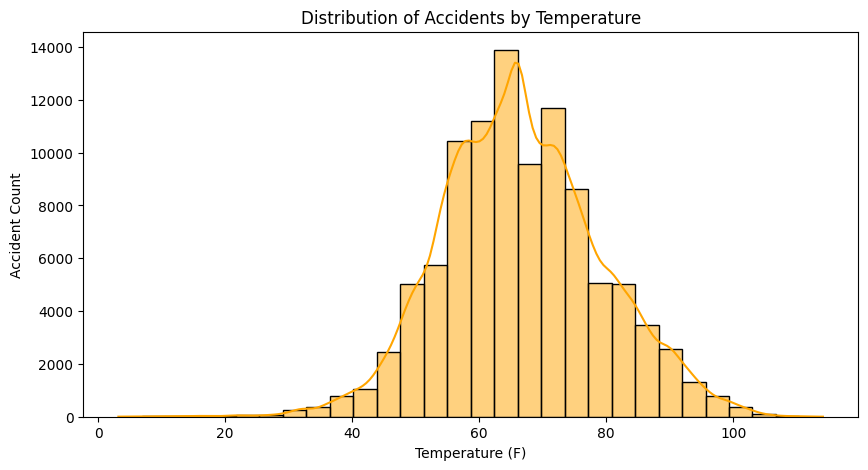

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Temperature(F)'], bins=30, kde=True, color="orange")
plt.title("Distribution of Accidents by Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Accident Count")
plt.show()

# Module 7 — Final Analysis and Storytelling

This module consolidates the key findings from the dataset into a clear narrative supported by visualizations.  
The focus is on readability, clarity, and professional storytelling, ensuring insights are easy to interpret.

## 1. Yearly Accident Trends
Understanding yearly variations helps in identifying long-term changes and possible external influences.

In [ ]:
accidents_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(8,5))
accidents_per_year.plot(kind='bar', color="#4C72B0", edgecolor='black')
plt.title("Accident Count by Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The yearly distribution shows how accident counts evolved over time. Noticeable changes may relate to traffic growth, reporting improvements, or unusual external events such as the pandemic years.

## 2. Geographic Distribution — Top 10 States
Geography plays an important role in accident patterns. Here we highlight the most affected states.

In [ ]:
top_states = df['State'].value_counts().nlargest(10)
plt.figure(figsize=(9,5))
top_states.plot(kind='barh', color="#55A868", edgecolor='black')
plt.gca().invert_yaxis()
plt.title("Top 10 States with Highest Accident Counts")
plt.xlabel("Number of Accidents")
plt.ylabel("State")
plt.tight_layout()
plt.show()

The distribution is uneven across states. States with larger populations and denser road networks naturally show more accidents, but this can also reflect data coverage quality in certain regions.

## 3. Seasonal Variation — Monthly Patterns
Analyzing monthly patterns highlights how seasons and weather conditions influence accident risk.

In [ ]:
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
acc_by_month = df['Month'].value_counts().reindex(month_order).fillna(0)

plt.figure(figsize=(10,5))
acc_by_month.plot(kind='bar', color="#C44E52", edgecolor='black')
plt.title("Monthly Accident Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The monthly view indicates seasonal peaks. Higher accident counts in certain months can be linked to holiday travel, weather extremes, or seasonal driving conditions.

## 4. Time of Day — Hourly Trends
Hourly analysis reveals the relationship between human activity cycles and accident occurrence.

In [ ]:
acc_by_hour = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10,4))
acc_by_hour.plot(kind='line', marker='o', color="#8172B2")
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour (24-hour format)")
plt.ylabel("Number of Accidents")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Accidents peak during morning and evening rush hours. This emphasizes the impact of commuting patterns and traffic density on road safety.

## 5. Combined View — Weekday vs Hour Heatmap
A combined weekday-hour analysis offers a more detailed view of accident clustering.

In [ ]:
pivot = df.pivot_table(index='Weekday', columns='Hour', values='ID', aggfunc='count').reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
).fillna(0)

plt.figure(figsize=(12,5))
plt.imshow(pivot, aspect='auto', cmap="YlOrRd")
plt.colorbar(label='Accident Count')
plt.title("Accident Intensity by Weekday and Hour")
plt.yticks(range(len(pivot.index)), pivot.index)
plt.xticks(range(0,24), range(0,24))
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()

The heatmap shows concentrated accident clusters on weekdays during commute hours, while weekends display different late-hour patterns. This highlights how both daily routines and lifestyle influence accident timings.

## 6. Weather Factor — Temperature Distribution
Weather is another key factor. Temperature data provides context for seasonal accident risks.

In [ ]:
if 'Temperature(F)' in df.columns:
    temp_df = df[['Month', 'Temperature(F)']].dropna()
    temp_df['Month'] = pd.Categorical(temp_df['Month'], categories=month_order, ordered=True)
    grouped = [temp_df[temp_df['Month'] == m]['Temperature(F)'] for m in month_order]

    plt.figure(figsize=(12,5))
    plt.boxplot(grouped, labels=month_order, showfliers=False)
    plt.title("Temperature Variation Across Months")
    plt.xlabel("Month")
    plt.ylabel("Temperature (°F)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Temperature patterns confirm seasonal variation, with lower values in winter months. Correlating accident peaks with colder periods may strengthen the argument for weather-driven risks.

# Conclusion and Recommendations
- Accident counts vary by year and region, suggesting both temporal and geographic influences.  
- Seasonal and hourly peaks highlight predictable patterns tied to human activity and weather.  
- Commuting times are particularly high-risk, requiring targeted safety measures.  
- Weather conditions, especially low temperatures, may further increase accident risk.  

**Recommendation:** Policymakers and planners can use these insights to prioritize road safety measures during high-risk times and in high-incidence regions.